In [1]:
import matplotlib.pyplot as plt
import json
import numpy as np

In [6]:
folder = 'Final'
filename = 'final_16'
max_file_num = 19
num_trials = 10000

In [7]:
data_sans_metadata = {}
max_k = 0

with open(folder+'/'+filename+'.json', 'r') as file:
    data = json.load(file)
    for k, v in data.items():
        if k.isdigit():
            if int(k)+max_k < num_trials:
                data_sans_metadata[max_k] = v
                max_k += 1

In [8]:
for file_num in range(1, max_file_num+1):
    with open(folder+'/'+filename+f' ({file_num}).json', 'r') as file:
        data = json.load(file)
        for k, v in data.items():
            
            if k.isdigit():
                if int(k)+max_k < num_trials:
                    data_sans_metadata[max_k] = v
                    max_k += 1

In [9]:
print(len(data_sans_metadata))

209


In [10]:
ratios = []
for trial in data_sans_metadata.values():
    #likelihood_pc = trial['trained_pc_likelihood']
    #likelihood_pc = np.exp(model.log_likelihood(trial['sequence']))
    likelihood_pc = np.exp(trial['model_1_likelihood'])
    likelihood_q = trial['trained_q_likelihood']
    #log_likelihood_q = -min(trial['training_curve_q'])/np.log(10) 
    #log_likelihood_npc = min(trial['training_curve_npc'])/np.log(10)
    likelihood_npc = trial['trained_npc_likelihood']
    if likelihood_npc>likelihood_pc:
        print(trial['model_1_likelihood'], trial['trained_npc_likelihood'])
    ratios.append(np.log10(likelihood_pc/likelihood_npc))
    #ratios.append(np.log10(likelihood_pc/likelihood_q))
    #ratios.append(np.log10(likelihood_q / likelihood_pc))
    #ratios.append(np.log10(likelihood_q/likelihood_npc))
    #ratios.append(np.log10(likelihood_pc / likelihood_q))
    #ratios.append(np.log10(likelihood_q)-log_likelihood_npc)
    #ratios.append(np.log10(likelihood_q / likelihood_npc))
    #ratios.append(log_likelihood_npc - np.log10(likelihood_pc))
    #ratios.append(likelihood_q-log_likelihood_npc)
    #ratios.append(likelihood_q/likelihood_npc)

-632.9385898138062 4.9371713137905294e-275
-642.9093450328565 1.0890569601455385e-279
-638.7157281482616 1.341275754745238e-277
-634.4555780364791 4.9004831649638325e-275


In [11]:
print(np.mean(ratios))
print(len(ratios))

5.2220426010057395
209


(array([ 4.,  6., 27., 32., 41., 43., 36., 14.,  5.,  1.]),
 array([-1.23079546,  0.11487146,  1.46053837,  2.80620529,  4.1518722 ,
         5.49753912,  6.84320603,  8.18887295,  9.53453986, 10.88020678,
        12.22587369]),
 <BarContainer object of 10 artists>)

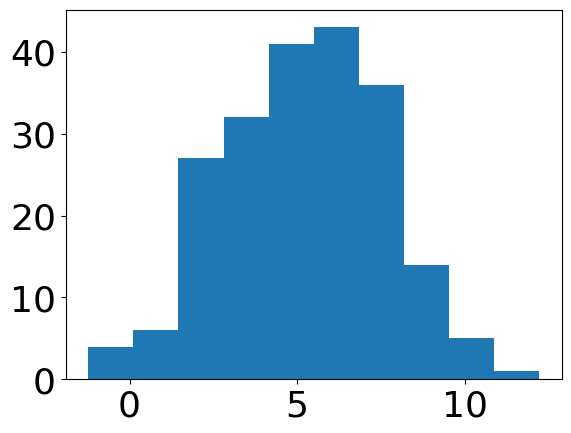

In [12]:
title = 'PCHMM_16_NPCMM_16_500_time_steps'
plt.rcParams.update({'font.size': 26})
plt.hist(ratios, bins=10)
#plt.title(title)
#plt.xlabel(r'$\log_{10} \left(\frac{\mathscr{L}_q}{\mathscr{L}_{npc} }\right)$')
#plt.ylabel(r'Trials')
#plt.savefig(title+'.png',bbox_inches='tight', pad_inches = 0.1)

In [13]:
min(ratios)

np.float64(-1.2307954555466845)

In [64]:
from HMM import PC_HMM

In [65]:
theta_gen = [2.1961912602516445, 0.07722519718841697, 1.1333546404402364]
observations = [-0.006313589141205697, -0.0010981613895532023, 0.0022960204279199436, 0.007239523585948188]

In [66]:
model = PC_HMM(ncl=16,
                k = 2,
               theta = theta_gen,
               observations = observations,
              )

In [22]:
data_sans_metadata = {}
max_k = 0

with open('PC_to_PC_to_NPC_to_QHMM/pc_to_pc_to_npc_to_q_test_16_500.json', 'r') as file:
#with open(f'PC_to_NPC_to_QHMM/4x4_100.json', 'r') as file:
#with open(f'PC_to_NPC_to_QHMM/ncl=nql.json', 'r') as file:
    data = json.load(file)
    for k, v in data.items():
        if k.isdigit():
            if int(k)+max_k < 500:
                data_sans_metadata[max_k] = v
                max_k += 1

In [23]:
for file_num in range(1,12):
    #with open(f'PC_to_NPC_to_QHMM/pc_test_4x4 ({file_num}).json', 'r') as file:
    #with open(f'PC_to_NPC_to_QHMM/4x4_100 ({file_num}).json', 'r') as file:
    #with open(f'PC_to_NPC_to_QHMM/ncl=nql ({file_num}).json', 'r') as file:
    with open(f'PC_to_PC_to_NPC_to_QHMM/pc_to_pc_to_npc_to_q_test_16_500 ({file_num}).json', 'r') as file:
        data = json.load(file)
        print(file_num)
        for k, v in data.items():
            
            if k.isdigit():
                if int(k)+max_k < 500:
                    data_sans_metadata[max_k] = v
                    max_k += 1
                    
                    

1
2
3
4
5
6
7
8
9
10
11


In [14]:
len(data_sans_metadata.keys())

99

In [60]:
from qiskit.circuit.library import efficient_su2